In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Load

results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')

In [3]:
#Merge

df = pd.merge(results,races[['raceId','year','name','round']],on='raceId',how='left')
df = pd.merge(df,drivers[['driverId','driverRef','nationality']],on='driverId',how='left')
df = pd.merge(df,constructors[['constructorId','name','nationality']],on='constructorId',how='left')

In [4]:
#Drop columns

df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','raceId','driverId','constructorId'],axis=1,inplace=True)

In [5]:
#rename Columns

df.rename(columns={'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality','name_y':'constructer_name','nationality_y':'constructer_nationality','driverRef':'driver','positionOrder':'position_order','fastestLapTime':'fastest_lap_time','fastestLapSpeed':'fastest_lap_speed'},inplace=True)

In [6]:
#rearrange columns

df = df[['year','gp_name','round', 'driver','constructer_name','grid',  
         'position_order', 'points', 'time', 'milliseconds',
       'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed', 
         'driver_nationality', 
       'constructer_nationality']]

In [7]:
# Drop season 2019

df = df[df['year']!=2019]

In [8]:
#Sort values

df = df.sort_values(by=['year','round','position_order'],ascending=[False,True,True])

In [9]:
#Replace /N

df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
df.fastest_lap_time.replace('\\N',np.nan,inplace=True)
df.fastest_lap_speed.replace('\\N',np.nan,inplace=True)


In [10]:
#Cange data types


df.milliseconds = df.milliseconds.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.fastest_lap_speed = df.fastest_lap_speed.astype(float)


In [11]:
#Reset index

df.reset_index(drop=True,inplace=True)

In [12]:
# shape

df.shape

(25660, 15)

In [13]:
#info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25660 non-null  int64  
 1   gp_name                  25660 non-null  object 
 2   round                    25660 non-null  int64  
 3   driver                   25660 non-null  object 
 4   constructer_name         25660 non-null  object 
 5   grid                     25660 non-null  int64  
 6   position_order           25660 non-null  int64  
 7   points                   25660 non-null  float64
 8   time                     7055 non-null   object 
 9   milliseconds             7054 non-null   float64
 10  fastest_lap_rank         7411 non-null   float64
 11  fastest_lap_time         7199 non-null   object 
 12  fastest_lap_speed        7199 non-null   float64
 13  driver_nationality       25660 non-null  object 
 14  constructer_nationalit

In [14]:
#head

df.head(10)

,year,gp_name,round,driver,constructer_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructer_nationality
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736.0,6.0,1:36.236,202.452,Dutch,Austrian
1,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18.0,+11.987,5648723.0,7.0,1:36.344,202.225,Mexican,Austrian
2,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15.0,+38.637,5675373.0,5.0,1:36.156,202.620,Spanish,British
3,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12.0,+48.052,5684788.0,14.0,1:37.130,200.588,Spanish,Italian
4,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10.0,+50.977,5687713.0,10.0,1:36.546,201.802,British,German
5,2023,Bahrain Grand Prix,1,stroll,Aston Martin,8,6,8.0,+54.502,5691238.0,9.0,1:36.546,201.802,Canadian,British
6,2023,Bahrain Grand Prix,1,russell,Mercedes,6,7,6.0,+55.873,5692609.0,17.0,1:37.221,200.401,British,German
7,2023,Bahrain Grand Prix,1,bottas,Alfa Romeo,12,8,4.0,+1:12.647,5709383.0,18.0,1:37.379,200.075,Finnish,Swiss
8,2023,Bahrain Grand Prix,1,gasly,Alpine F1 Team,20,9,2.0,+1:13.753,5710489.0,2.0,1:35.068,204.939,French,French
9,2023,Bahrain Grand Prix,1,albon,Williams,15,10,1.0,+1:29.774,5726510.0,15.0,1:37.144,200.559,Thai,British


In [15]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

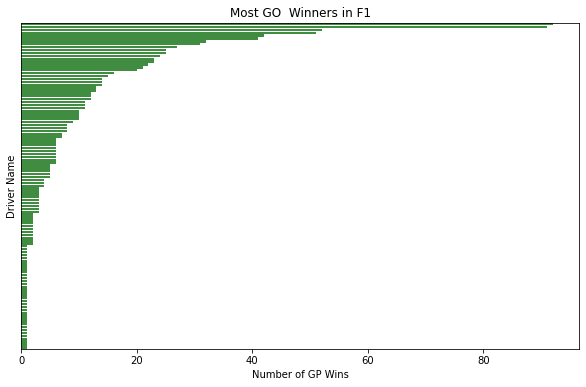

In [16]:
#GP Winners

driver_winner = df.loc[df['position_order']==1].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

#Barplot

sb.barplot(data=driver_winner,y='driver',x='position_order',color='green',alpha=0.8)
plt.title('Most GO  Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
plt.yticks([])

In [17]:
#Create new dataframe of top 10 GP Winners

top10Drivers = driver_winner.head(10)

print(top10Drivers)

               driver  position_order
0            hamilton              92
1  michael_schumacher              91
2              vettel              52
3               prost              51
4      max_verstappen              42
5               senna              41
6              alonso              32
7             mansell              31
8             stewart              27
9               lauda              25


Text(0.5, 0, 'Number of GP wins')

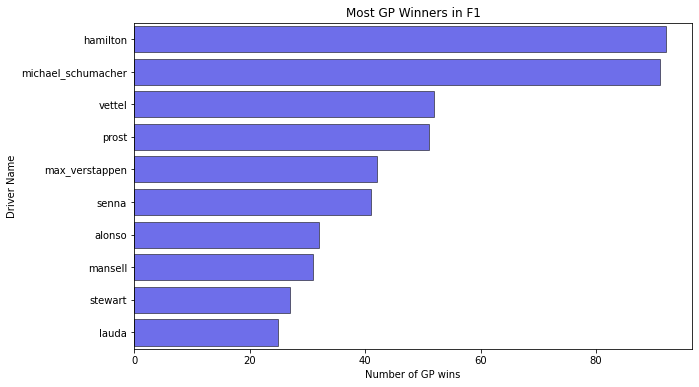

In [18]:
# Top 10 drivers plot

sb.barplot(data=top10Drivers,y='driver',x='position_order',color='blue',alpha=0.65,linewidth=.8,edgecolor='black')
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

([], [])

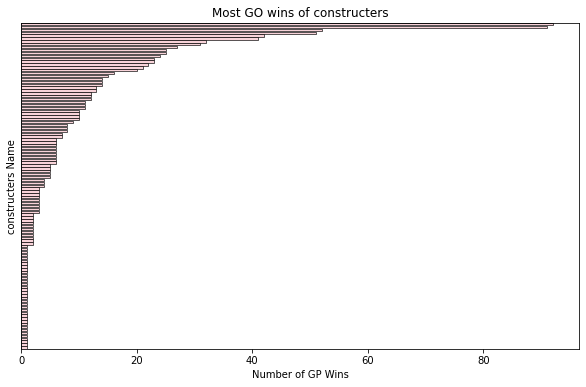

In [19]:
#GP Winners

constructer_winner = df.loc[df['position_order']==1].groupby('constructer_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

#Barplot

sb.barplot(data=driver_winner,y='driver',x='position_order',color='pink',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('Most GO wins of constructers')
plt.ylabel('constructers Name')
plt.xlabel('Number of GP Wins')
plt.yticks([])

In [20]:
#Top 10 GP constructer winners

top10constructer = constructer_winner.head(10)

print(top10constructer)

  constructer_name  position_order
0          Ferrari             240
1          McLaren             179
2         Williams             114
3         Mercedes             110
4         Red Bull             101
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0.5, 0, 'Number of GP wins')

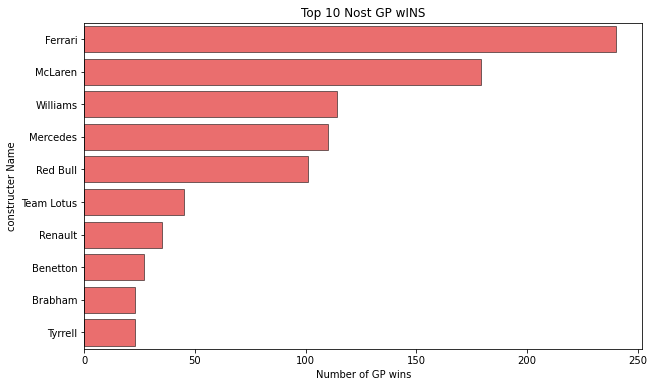

In [21]:
# Top 10 constructer plot

sb.barplot(data=top10constructer,y='constructer_name',x='position_order',color='red',alpha=0.65,linewidth=.8,edgecolor='black')
plt.title('Top 10 Nost GP wINS')
plt.ylabel('constructer Name')
plt.xlabel('Number of GP wins')

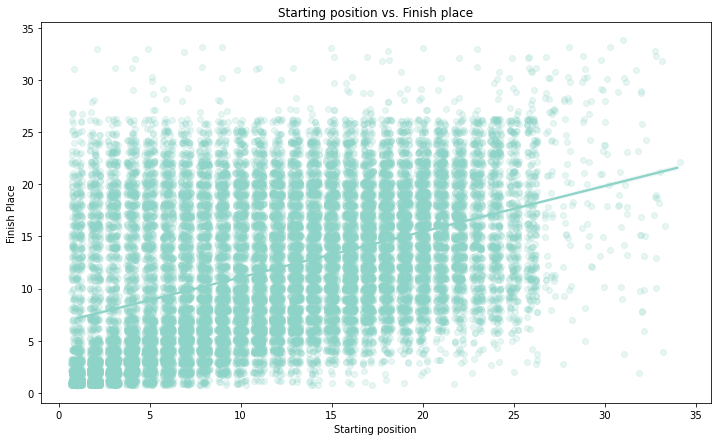

In [22]:
df_no_zero = df[df['grid']!= 0]

#Create a plot
plt.figure(figsize=[12,7])
sb.regplot(data=df_no_zero,x='grid',y='position_order',x_jitter=  0.3, y_jitter=  0.3,scatter_kws = {'alpha':1/5})
plt.title('Starting position vs. Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position')
plt.show()

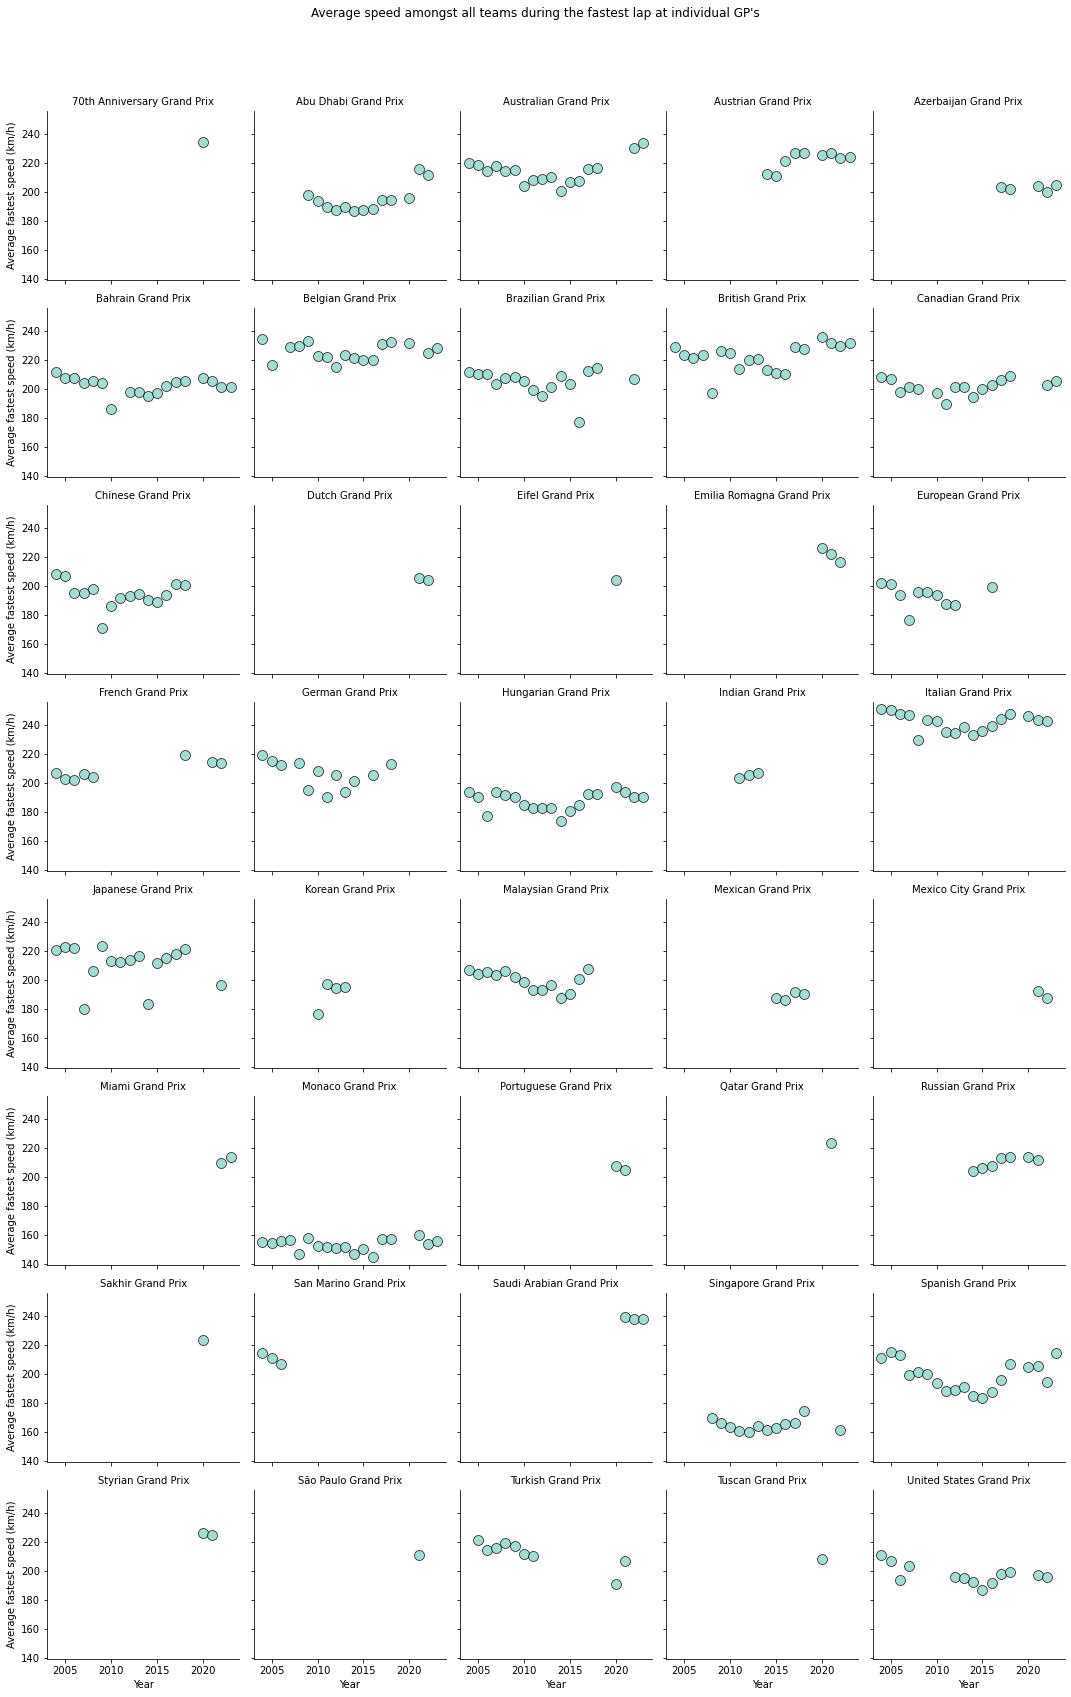

In [23]:
#Create new data frame for seasons 2004 onwards
df_speed = df[df['year']>= 2004]
df_group_speed = df_speed.groupby(['gp_name','year'])['fastest_lap_speed'].mean().to_frame().reset_index()

#create a facegrid
g =sb.FacetGrid(data = df_group_speed, col = 'gp_name',
               col_wrap=5)
g.map(plt.scatter,'year','fastest_lap_speed',alpha=0.8,linewidth=.8,edgecolor='black',s=100)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Average speed amongst all teams during the fastest lap at individual GP's")
plt.show()